In [69]:
import cv2
import numpy as np
import math 
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

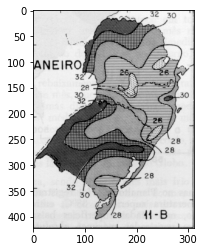

In [70]:
ax = cv2.imread('janei.pgm',cv2.IMREAD_COLOR)
img = mpimg.imread('janei.pgm')
imgplot = plt.imshow(img, cmap='gray', vmin=0, vmax=255)
plt.show()

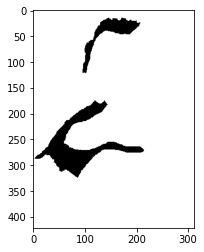

In [71]:
ay = cv2.imread('janei-1.pgm',cv2.IMREAD_GRAYSCALE)
img = mpimg.imread('janei-1.pgm')
imgplot = plt.imshow(img, cmap='gray', vmin=0, vmax=255)
plt.show()

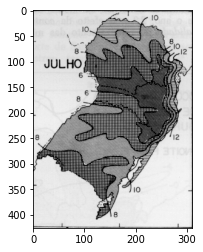

In [72]:
qx = cv2.imread('julho.pgm',cv2.IMREAD_COLOR)
img = mpimg.imread('julho.pgm')
imgplot = plt.imshow(img, cmap='gray', vmin=0, vmax=255)
plt.show()

In [73]:
ax = np.float32(ax)
ay = np.float32(ay)
qx = np.float32(qx)

In [74]:
rows = len(ax)
columns = len(ax[0])
features = np.zeros((rows*columns, 3))
saidas = np.zeros((rows*columns, 1))

i = 0
for l in range(rows):
    for c in range(columns):
        features[i,0]=ax[l,c,0]/255.0
        features[i,1]=ax[l,c,1]/255.0
        features[i,2]=ax[l,c,2]/255.0
        saidas[i]=ay[l,c]/255.0
        i=i+1

In [75]:
features = np.float32(features)
flann_params = dict(algorithm=1, trees=4)
flann = cv2.flann_Index(features,  flann_params)

In [76]:
qp = np.zeros((len(qx), len(qx[0])))
query = np.float32(np.zeros((1,3)))
indices = np.int32(np.zeros(1))
dists = np.float32(np.zeros(1))

for l in range(len(qp)):
    for c in range(len(qp[0])):
        query[0,0] = qx[l,c,0]/255.0
        query[0,1] = qx[l,c,1]/255.0
        query[0,2] = qx[l,c,2]/255.0
        indices, dists = flann.knnSearch(query, 1, params={})
        qp[l,c] = 255*saidas[indices[0]]

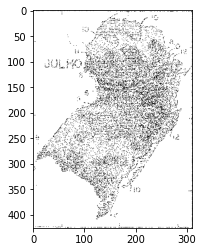

In [77]:
cv2.imwrite('qp.pgm', qp)
img = mpimg.imread('qp.pgm')
imgplot = plt.imshow(img, cmap='gray', vmin=0, vmax=255)
plt.show()